In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.optim import SGD
from torch.nn import MSELoss

In [ ]:
# Defining the FeedForward Neural Network
class SimpleFeedForwardModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleFeedForwardModel, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size) # First layer that defines the number of Nuerons
        self.output = nn.Linear(hidden_size, output_size) # 
    
    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = self.output(x)
        return x

In [4]:
x = torch.linspace(-10, 10, 100).view(-1, 1)

y = 2 * x + 1 + torch.rand_like(x)  * 2

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.hidden1 = nn.Linear(1, 10)
        self.hidden2 = nn.Linear(10, 5)
        self.output = nn.Linear(5, 1)

    
    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)

        return x

model = LinearRegression()
criterion = MSELoss()
optimizer = SGD(model.parameters(), lr=0.001)


In [ ]:
model

In [ ]:

epochs = 1000

for epoch in range(epochs):
    model.train()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad() # Zero the gradients before backpropagation
    loss.backward()
    optimizer.step() # Updates models parameters
print(loss)

tensor(0.3124, grad_fn=<MseLossBackward0>)


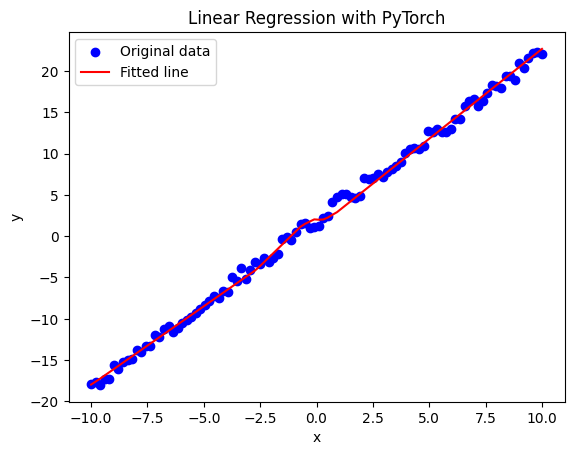

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x.numpy(), y.numpy(), color='blue', label='Original data')

# Plot the predicted line
predicted = model(x).detach().numpy() # Predicted y without gradient compuation and convert to numpy
plt.plot(x.numpy(), predicted, color='red', label='Fitted line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with PyTorch')
plt.show()

In [1]:
import torch

In [7]:
x = torch.tensor(3., requires_grad=True)

y = 3 * x **2 + 2*x + 2

for i in range(3):
    if x.grad is not None:  # Clear accumulated gradients manually
        x.grad.zero_()
    y.backward(retain_graph=True)
    print(x.grad)

tensor(20.)
tensor(20.)
tensor(20.)
